In [2]:
#Has the to present block
import numpy as np
import pandas as pd

import random
import os

from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from PIL import Image
import cv2

from astropy.visualization import make_lupton_rgb
plt.style.use('dark_background')

In [3]:
png_filepath = 'pngs_test/'
filepath = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn_multiclass/results/data/'
hdu_list = fits.open(filepath + 'Unique_positives_complete.fits')
images = hdu_list[1].data#[:,0:3,:,:]
data = pd.DataFrame(hdu_list[2].data)
hdu_list.close()

to_explore = pd.read_csv('explore_coadd_ids_2.csv')
mask = data['COADD_OBJECT_ID'].isin(to_explore['COADD_OBJECT_ID'])

data = data[mask]
images = images[data.index]
print(len(data), len(images))

24 24


In [4]:
def make_plot_all(objects, title, data, Q, stretch, minimum):
    for i in range(len(objects)):
        if(i%8 == 0):
            plt.figure(figsize=(10,2))
            for j in range(8):
                if(i+j > len(objects)-1): break
                plt.subplot(1,8,j+1)
                #print(data['COADD_OBJECT_ID'].iloc[i+j]) 
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], 
                                    Q=Q, stretch=stretch, minimum=minimum)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            #plt.savefig(png_filepath + title + '.png', bbox_inches='tight')
            plt.show() 

            
def make_plot_all_brit(objects, title, data):
    for i in range(len(objects)):
        if(i%8 == 0):
            plt.figure(figsize=(10,2))
            for j in range(8):
                if(i+j > len(objects)-1): break
                plt.subplot(1,8,j+1)
        
                #Color channel manipulation
                imager = 0.0005*objects[i+j][2] 
                imageg = 3*objects[i+j][1] 
                imageb = 15*objects[i+j][0] 
                rgb = np.array([imager, imageg, imageb])
                #Making sure values are lower or equal to 255
                rgb = np.clip(rgb, 0, 255).astype(np.uint8)
                rgb = rgb.transpose(1, 2, 0)
                
                #Increasing contrast
                min_img, max_img = np.min(rgb), np.max(rgb)     
                LUT=np.zeros(256,dtype=np.uint8)
                LUT[min_img:max_img+1]=np.linspace(start=0,stop=255,num=(max_img-min_img)+1,endpoint=True,dtype=np.uint8)
                rgb = LUT[rgb]
                
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            #plt.savefig(png_filepath + title + '.png', bbox_inches='tight')
            plt.show() 
            

First filter (normal) with a bit less noise


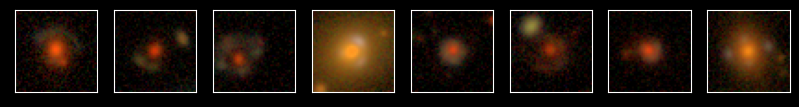

Second filter (green)


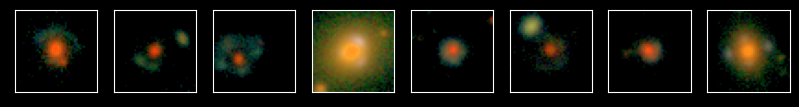

Previous third filter (blue but it is too faint)


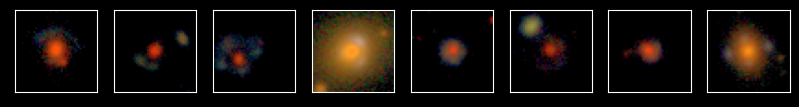

Proposed new third filter: makes blue faint arcs brighter


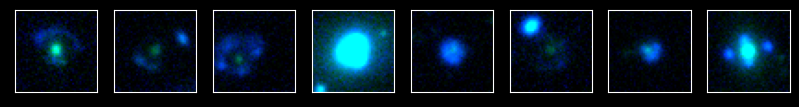

Next set: 

First filter (normal) with a bit less noise


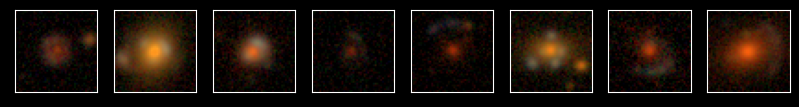

Second filter (green)


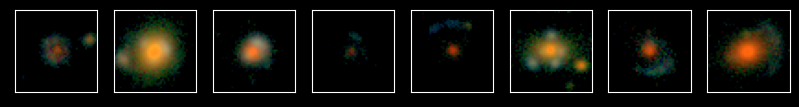

Previous third filter (blue but it is too faint)


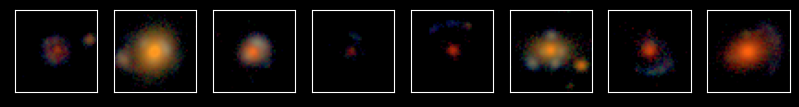

Proposed new third filter: makes blue faint arcs brighter


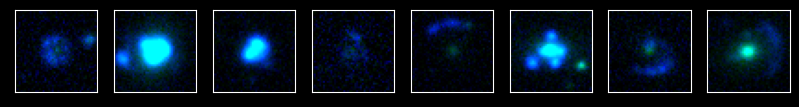

Next set: 

First filter (normal) with a bit less noise


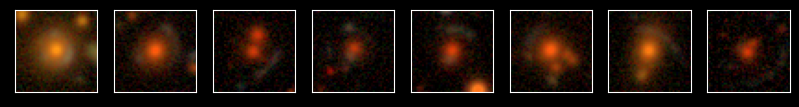

Second filter (green)


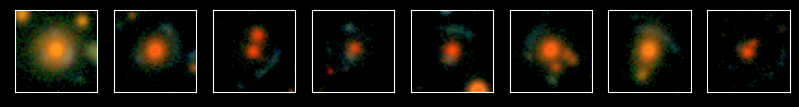

Previous third filter (blue but it is too faint)


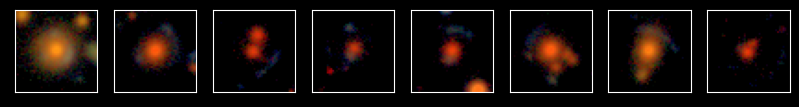

Proposed new third filter: makes blue faint arcs brighter


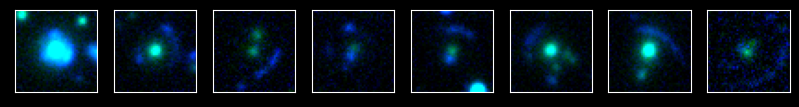

Next set: 



In [9]:
#To present
for i in range(3):
    images_tmp = images[i*8: (i*8)+8]
    data_tmp = data.iloc[i*8: (i*8)+8]
    
    print('First filter (normal) with a bit less noise')
    Q, stretch, minimum = 9, 60, (0,0,0) #normal, natural strech=42,70
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    print('Second filter (green)')
    Q, stretch, minimum = 8, 40, (14,2,0) #stretch=35, 45
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    print('Previous third filter (blue but it is too faint)')
    Q, stretch, minimum = 10, 37, (12,6,0)
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    print('Proposed new third filter: makes blue faint arcs brighter')
    make_plot_all_brit(images_tmp, 'title', data_tmp)
    
    print('Next set: \n')

First filter (normal)


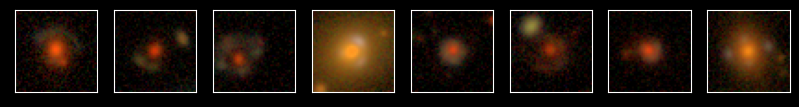

Second filter


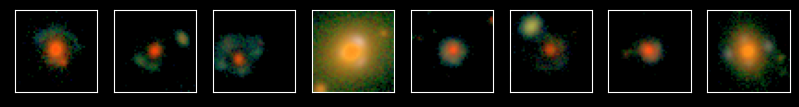

A new setting idea?


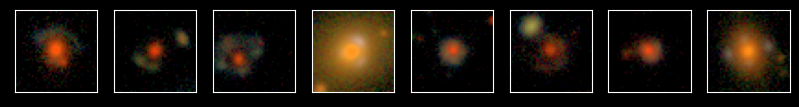

Third filter


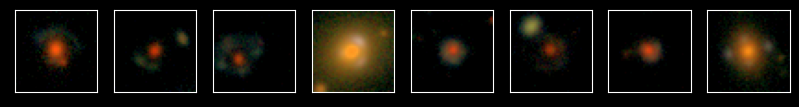

Next set: 

First filter (normal)


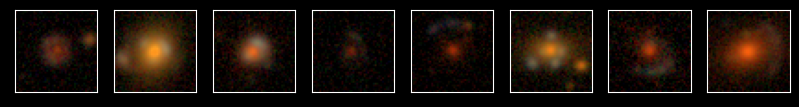

Second filter


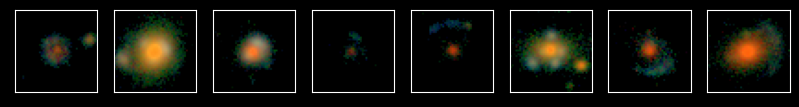

A new setting idea?


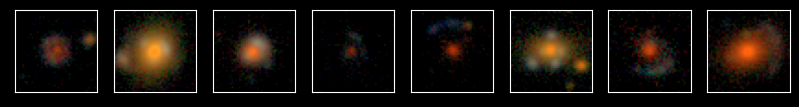

Third filter


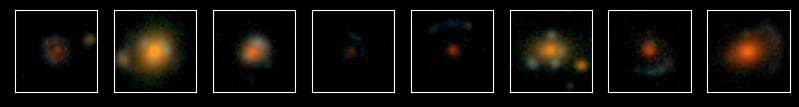

Next set: 

First filter (normal)


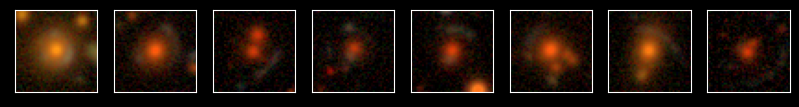

Second filter


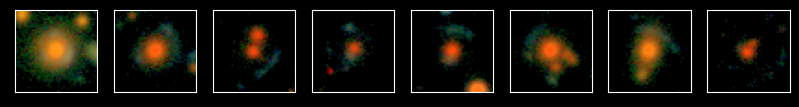

A new setting idea?


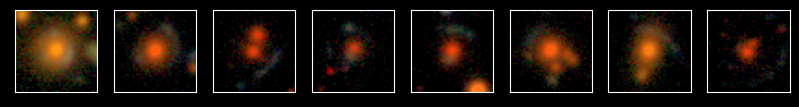

Third filter


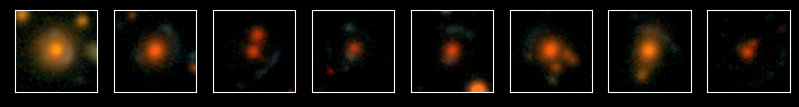

Next set: 



In [5]:
#To present
for i in range(3):
    images_tmp = images[i*8: (i*8)+8]
    data_tmp = data.iloc[i*8: (i*8)+8]
    
    print('First filter (normal)')
    Q, stretch, minimum = 9, 60, (0,0,0) #normal, natural strech=42,70
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    print('Second filter')
    Q, stretch, minimum = 8, 35, (14,2,0)
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    print('A new setting idea?')
    Q, stretch, minimum = 9, 40, (6,2,0)
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    print('Third filter')
    Q, stretch, minimum = 8, 70, (10,2,0)
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    print('Next set: \n')